# Trabajo Fin de Máster
## HateSpeech Detection
### Autor: Óscar Toimil Plaza
#### Tutores: Marcos Fernández Pichel y Mario Ezra Aragón Saenzpardo

-------------------------------------------

## Imports

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
!pip install emoji==1.7
import emoji
from collections import Counter
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 14.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171031 sha256=c1f5e4b4165a747c0976640345e5df506e43828cab98e4732a79283b75d67f45
  Stored in directory: /root/.cache/pip/wheels/e0/8c/e0/294d2e4ea0e55792bfc99b6b263e4a0511443da7b69af67688
Successfully built emoji


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


## Variables globales

In [4]:
DATASETS_NAME = {
    'IBEREVAL_MISOGYNY_2018_TRAIN':'ibereval_misogyny2018_es_train.csv',
    'IBEREVAL_MISOGYNY_2018_TEST':'ibereval_misogyny2018_es_test.csv',
}
DATASETS_DELIMITERS = {
    'IBEREVAL_MISOGYNY_2018':','
}
SEED_VALUE = 1

-------------------------------------------

## Lectura datos

-----------------------------------------------

#### IBEREVAL MISOGYNY 2018

In [6]:
df_ibereval = pd.read_csv ( DATASETS_NAME['IBEREVAL_MISOGYNY_2018_TRAIN'],
        skiprows=1,
        header=None,
        names = ["_", "id", "text", "misogynous", "misogyny_category", "target"],
        delimiter=DATASETS_DELIMITERS['IBEREVAL_MISOGYNY_2018'])
df_ibereval = df_ibereval.drop('_', axis=1)


----------------------------

## Análisis datos



-----------------------------------------------

### Vistazo general a los datos

-----------------------------------------------


In [16]:
df_ibereval.head()

,id,text,misogynous,misogyny_category,target
0,1,Módulo 01 Invitados Directivos del Sindicato '...,0,0,0
1,2,"@Causafiebres Claro, es que ha puesto imbécil ...",0,0,0
2,3,@Nanchinho A ver si haces algo que sirva para ...,1,discredit,active
3,4,@Rafhyta86 @ElDesmadre__ Habe pasame el video ...,1,discredit,passive
4,5,@Otb_35 Que te calles so guarra.,1,dominance,active


In [17]:
df_ibereval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3307 entries, 0 to 3306
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 3307 non-null   int64 
 1   text               3307 non-null   object
 2   misogynous         3307 non-null   int64 
 3   misogyny_category  3307 non-null   object
 4   target             3307 non-null   object
dtypes: int64(2), object(3)
memory usage: 129.3+ KB


In [18]:
#Valores unicos
df_ibereval.nunique()

,0
id,3307
text,3307
misogynous,2
misogyny_category,6
target,3



-----------------------------------------------

### Proporciones

-----------------------------------------------


In [19]:
print("Proporcion en la columna 'misogynous':")
df_ibereval["misogynous"].value_counts(normalize=True) * 100

Proporcion en la columna 'misogynous':


,proportion
misogynous,
0,50.136075
1,49.863925


In [20]:
print("Proporcion en la columna 'misogyny_category':")
df_ibereval["misogyny_category"].value_counts()

Proporcion en la columna 'misogyny_category':


,count
misogyny_category,
0,1658
discredit,978
dominance,302
sexual_harassment,198
stereotype,151
derailing,20


In [21]:
print("Proporcion en la columna 'target':")
df_ibereval["target"].value_counts(normalize=True) * 100

Proporcion en la columna 'target':


,proportion
target,
0,50.136075
active,43.997581
passive,5.866344



-----------------------------------------------

### Longitud de los textos

-----------------------------------------------


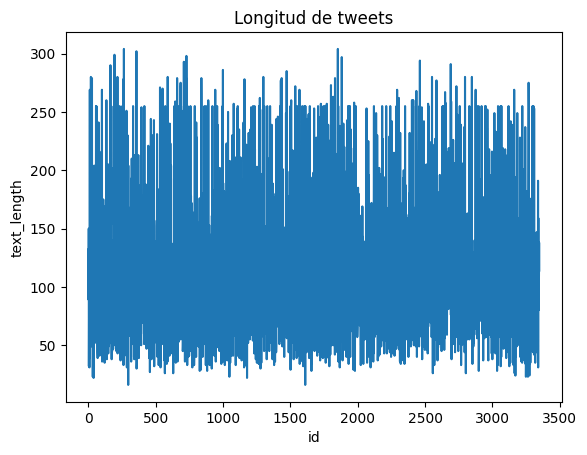

In [22]:
df_ibereval["text_length"] = df_ibereval["text"].apply(len)

sns.lineplot(x=df_ibereval["id"],  y=df_ibereval["text_length"])
plt.title("Longitud de tweets")
plt.show()

In [23]:
# Longitud máxima y mínima
print("Longitud máxima: ", max(df_ibereval["text_length"]))
print("Longitud mínima: ", min(df_ibereval["text_length"]))

Longitud máxima:  304
Longitud mínima:  16



-----------------------------------------------

### Palabras más frecuentes

-----------------------------------------------


In [ ]:
stop_words = set(stopwords.words('spanish') + list(string.punctuation) + ['http', 'https', 't.co'])

tweets = " ".join(df_ibereval["text"])
words = word_tokenize(tweets.lower())

words_filtered = [word for word in words if word not in stop_words]
word_freq = Counter(words_filtered)

print("Las 25 palabras más comunes en textos misóginos y su núm de apariciones:")
word_freq.most_common(25)

Las 25 palabras más comunes en textos misóginos y su núm de apariciones:


[('puta', 1684),
 ('perra', 710),
 ('callate', 449),
 ('cállate', 408),
 ('si', 373),
 ('hijo', 366),
 ('madre', 286),
 ('...', 280),
 ('mereces', 278),
 ('acoso', 240),
 ('zorra', 239),
 ('q', 215),
 ('mierda', 212),
 ('mujer', 200),
 ('hija', 167),
 ('violación', 163),
 ('ser', 154),
 ('polla', 147),
 ('cara', 143),
 ('boca', 130),
 ('mujeres', 113),
 ('enseñar', 110),
 ('guarra', 100),
 ('tan', 100),
 ('coño', 100)]

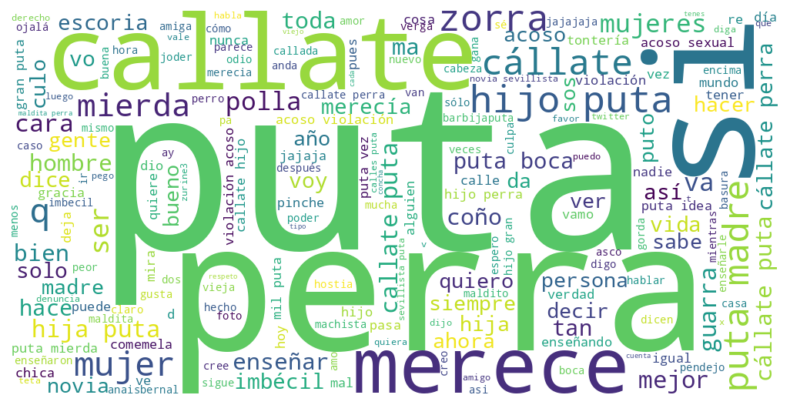

In [ ]:
# Nube de palabras de las palabras más comunes

words_filtered = re.compile(
    r"((?<=[^a-zA-Z0-9])(?:https?\:\/\/|[a-zA-Z0-9]{1,}\.{1}|\b)(?:\w{1,}\.{1}){1,5}(?:com|co|org|edu|gov|uk|net|ca|de|jp|fr|au|us|ru|ch|it|nl|se|no|es|mil|iq|io|ac|ly|sm){1}(?:\/[a-zA-Z0-9]{1,})*)"
).sub("", " ".join(words_filtered))

wordcloud = WordCloud(width=1000, height=500, background_color="white").generate(words_filtered)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [26]:
# Palabras más comunes en los tweets misóginos

misogynistic_texts = " ".join(df_ibereval[df_ibereval["misogynous"] == 1]["text"])
words = word_tokenize(misogynistic_texts.lower())

words_filtered_misogynistic_texts = [word for word in words if word not in stop_words]
word_freq = Counter(words_filtered_misogynistic_texts)

print("Las 25 palabras más comunes en textos misóginos y su núm de apariciones:")
word_freq.most_common(25)

Las 25 palabras más comunes en textos misóginos y su núm de apariciones:


[('puta', 731),
 ('perra', 531),
 ('callate', 284),
 ('cállate', 258),
 ('zorra', 205),
 ('si', 178),
 ('hija', 145),
 ('mereces', 143),
 ('mujer', 123),
 ('...', 113),
 ('q', 94),
 ('mierda', 88),
 ('madre', 86),
 ('polla', 71),
 ('vos', 70),
 ('guarra', 68),
 ('novia', 67),
 ('bien', 60),
 ('ser', 59),
 ('coño', 57),
 ('mujeres', 53),
 ('cara', 52),
 ('mas', 51),
 ('boca', 51),
 ('culo', 51)]

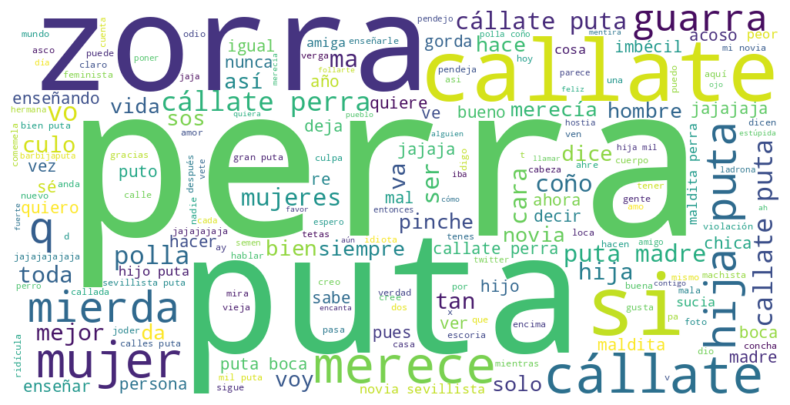

In [27]:
# Nube de palabras de las palabras más comunes en textos misoginos

#eliminamos urls
words_filtered_misogynistic_texts = re.compile(
    r"((?<=[^a-zA-Z0-9])(?:https?\:\/\/|[a-zA-Z0-9]{1,}\.{1}|\b)(?:\w{1,}\.{1}){1,5}(?:com|co|org|edu|gov|uk|net|ca|de|jp|fr|au|us|ru|ch|it|nl|se|no|es|mil|iq|io|ac|ly|sm){1}(?:\/[a-zA-Z0-9]{1,})*)"
).sub("", " ".join(words_filtered_misogynistic_texts))

wordcloud = WordCloud(width=1000, height=500, background_color="white").generate(words_filtered_misogynistic_texts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


-----------------------------------------------

### Hashtags

-----------------------------------------------


In [28]:
# Hashtags más comunes
df_ibereval["hashtags"] = df_ibereval["text"].apply(lambda x: re.findall(r"#(\w+)", x))
list_ibereval_hashtags = [hashtag for hashtags in df_ibereval["hashtags"] for hashtag in hashtags]

hashtag_counts = Counter(list_ibereval_hashtags)

print("Los 15 hashtags más comunes y su núm de apariciones:")
hashtag_counts.most_common(15)

Los 15 hashtags más comunes y su núm de apariciones:


[('OTGala7', 18),
 ('Arandina', 7),
 ('OTGala9', 6),
 ('MeToo', 4),
 ('HaceMuchoQue', 4),
 ('feminazis', 3),
 ('Humor', 3),
 ('FinalGH', 3),
 ('CamilaVallejo', 3),
 ('ExatlonMx', 2),
 ('sexo', 2),
 ('OTGala8', 2),
 ('Asco', 2),
 ('NiUnaMenos', 2),
 ('Denuncia', 2)]

In [29]:
# Ver todos los hashtags
print(f"Hay {len(list_ibereval_hashtags)} hashtags en los {len(df_ibereval.index)} datos")
for i in df_ibereval["hashtags"]:
    if (len(i)>0):
        print(i)

Hay 276 hashtags en los 3307 datos
['OTGala9']
['puralata', 'feminazis', 'HombreAbusado']
['OTGala9']
['perra', 'LasChicasDelCable2']
['feminazis', 'Femimoda']
['TITULAESNACIONALES']
['nv']
['ExatlonMx']
['femimoda', 'feminazis']
['hombres', 'votojusto']
['sexo', 'webcam']
['OTGala8']
['WK12CL']
['alertaporhijodeputa', 'alertacabronazo', 'alertatuputamadre']
['Asco']
['MeToo']
['twitter']
['masqueamigus']
['mexiquenses', 'NiUnaMas', 'NiUnaMenos', 'Denuncia', 'Edomex']
['TomaDosTazas']
['Pap399']
['RAWCL']
['OTDirecto18D']
['CONFIA']
['BatiArjona']
['AM1080']
['OTGala8']
['OTGala9']
['NosQueremosVivas']
['GoldenGlobes2018']
['noalaviolenciamachista']
['feminazi']
['HaceMuchoQue']
['Afregar']
['Humor']
['DeRegaloTeMereces']
['Arandina', 'abuso', 'sexual']
['Denuncia']
['comolavidamisma']
['elproblemanoerapacoherrera']
['Castración']
['Hollywood', 'MeToo']
['glamour']
['SinCerebro', 'SinDerechos', 'SinPolla']
['DENÚNCIALO']
['STOPBullyingHomeopático']
['abusosexual', 'sucesos', 'Arandina'

In [30]:
# Hashtags en tweets misóginos
misogynous_hashtags = df_ibereval[df_ibereval["misogynous"] == 1]["hashtags"].explode().dropna()
misogynous_hashtags_counts = Counter(misogynous_hashtags)

print("Los 15 hashtags más comunes en textos misóginos y su núm de apariciones:")
misogynous_hashtags_counts.most_common(15)

Los 15 hashtags más comunes en textos misóginos y su núm de apariciones:


[('feminazis', 3),
 ('OTGala7', 3),
 ('CamilaVallejo', 3),
 ('ExatlonMx', 2),
 ('sexo', 2),
 ('Humor', 2),
 ('Betis', 2),
 ('myhyv', 2),
 ('puralata', 1),
 ('HombreAbusado', 1),
 ('perra', 1),
 ('LasChicasDelCable2', 1),
 ('Femimoda', 1),
 ('nv', 1),
 ('femimoda', 1)]

In [31]:
# Todos los hashtags que aparecen en tweets misóginos
print(f"De los {len(list_ibereval_hashtags)} hashtags, en tweets misóginos hay {len(misogynous_hashtags)}")
for i in misogynous_hashtags:
    if (len(i)>0):
        print(i)

De los 276 hashtags, en tweets misóginos hay 104
puralata
feminazis
HombreAbusado
perra
LasChicasDelCable2
feminazis
Femimoda
nv
ExatlonMx
femimoda
feminazis
hombres
votojusto
sexo
webcam
WK12CL
twitter
masqueamigus
TomaDosTazas
Pap399
RAWCL
OTGala8
feminazi
Afregar
Humor
DeRegaloTeMereces
elproblemanoerapacoherrera
Castración
glamour
SinCerebro
SinDerechos
SinPolla
Humor
SorryNotSorry
FinalGH
YuriIsOverParty
CállateYfriega
NewCine
Sevillafc
Béticos
BetisDeportivo
Betis
perroanimal
PartyChilensisFtAñoNuevo
SabiasQue
EnTuJeta
TIMESUP
videosxxxmaduras
milf
mom
mature
maduras
maduritas
xxx
NoALaReformaPrevisional
Cacerolazo
deber
hedicho
OTGala7
CamilaVallejo
camilavallejo
FEMINAZIS
VocesUnidasONU
FINALLIGAAGUILAxWIN
TetasFree
morenas
porn
sexooral
otdirecto12d
MeToo
ExatlonMx
iHeartAwards
BestBoyBand
BTS
CamilaVallejo
Chile
Asco
VÍDEO
minoviaesdelsevillayesunaputamas
CamilaVallejo
TodasPutas
Sevilla
Betis
SevillaBetis
MerryChristmas
fapza
GravedadAnteTodo
OTGala7
AlCongresoPorLosJubilado


-----------------------------------------------

### Emojis

-----------------------------------------------


In [32]:
def extract_emojis(text):
    return [char for char in text if char in emoji.UNICODE_EMOJI["es"]]
df_ibereval["emojis"] = df_ibereval["text"].apply(extract_emojis)

In [33]:
# Emojis más comunes
all_emojis = [e for emojis in df_ibereval["emojis"] for e in emojis]
emoji_counts = Counter(all_emojis)

print("Los 15 emojis más comunes y su núm de apariciones:")
emoji_counts.most_common(15)

Los 15 emojis más comunes y su núm de apariciones:


[('😂', 146),
 ('❤', 38),
 ('😡', 36),
 ('😭', 21),
 ('😍', 21),
 ('🙄', 21),
 ('💛', 20),
 ('😒', 15),
 ('😘', 15),
 ('😈', 12),
 ('💕', 12),
 ('🔥', 12),
 ('🤣', 11),
 ('🤔', 9),
 ('🎶', 9)]

In [34]:
# emojis en tweets misoginos
misogynous_emojis = df_ibereval[df_ibereval["misogynous"] == 1]["emojis"].explode().dropna()
misogynous_emojis_counts = Counter(misogynous_emojis)

print("Los 15 emojis más comunes en textos misóginos y su núm de apariciones:")
misogynous_emojis_counts.most_common(15)

Los 15 emojis más comunes en textos misóginos y su núm de apariciones:


[('😂', 79),
 ('😭', 18),
 ('🙄', 15),
 ('❤', 12),
 ('😡', 12),
 ('💩', 9),
 ('😘', 8),
 ('😍', 7),
 ('♥', 7),
 ('💦', 5),
 ('🤯', 5),
 ('👅', 5),
 ('✨', 5),
 ('🤣', 5),
 ('👋', 5)]

In [35]:
print(f"De {len(all_emojis)} emojis, {len(misogynous_emojis)} estan incluidos en tweets misoginos")

De 728 emojis, 352 estan incluidos en tweets misoginos


--------------------------------------------

In [1]:
! pip install "matplotlib<3.8"
import matplotlib.pyplot as plt

In [2]:
! pip install shifterator
import shifterator as sh

  Using cached shifterator-0.3.0-py3-none-any.whl.metadata (2.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 MB 23.7 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


[]

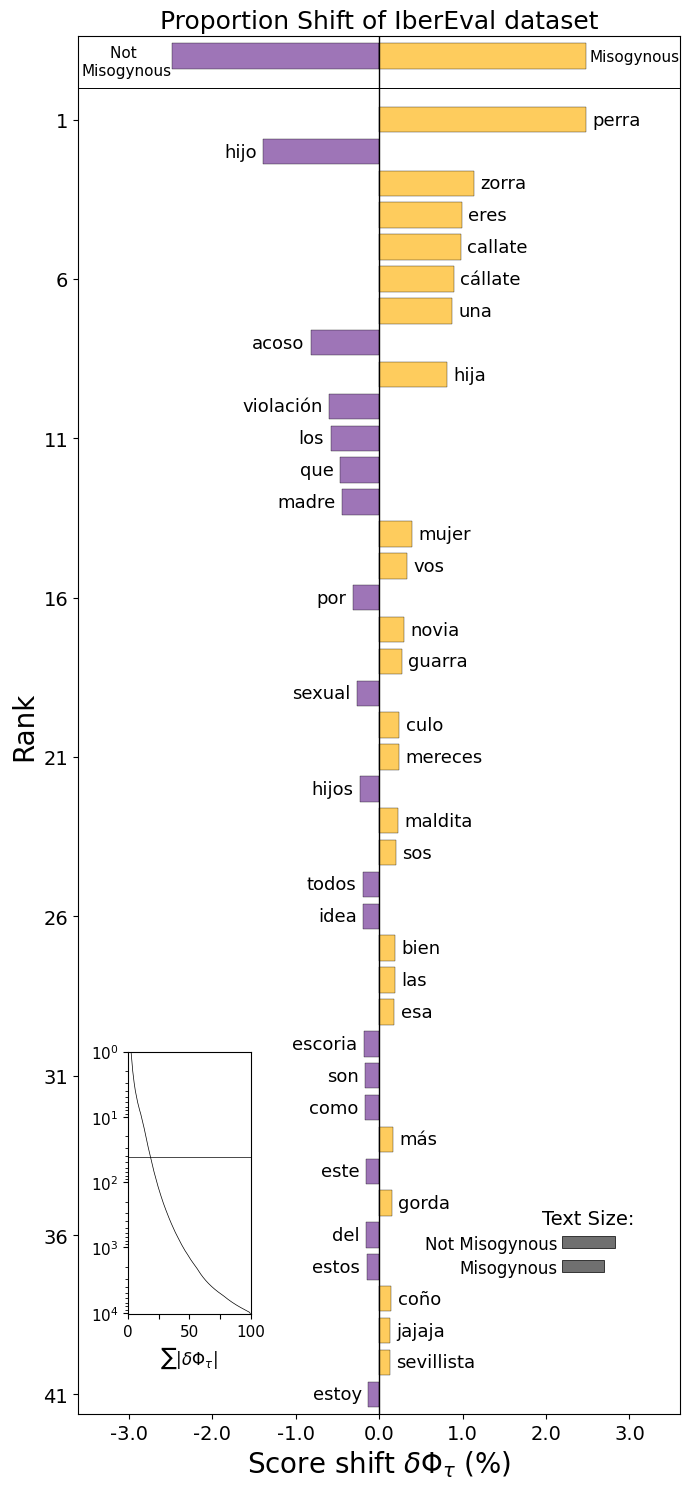

In [15]:
url_pattern = re.compile(
    r"((?<=[^a-zA-Z0-9])(?:https?\:\/\/|[a-zA-Z0-9]{1,}\.{1}|\b)"
    r"(?:\w{1,}\.{1}){1,5}"
    r"(?:com|co|org|edu|gov|uk|net|ca|de|jp|fr|au|us|ru|ch|it|nl|se|no|es|mil|iq|io|ac|ly|sm)"
    r"(?:\/[a-zA-Z0-9]{1,})*)"
)

def preprocess_tweets_no_stopwords(tweets, url_pattern):
    text = " ".join(tweets).lower()

    text = url_pattern.sub("", text)
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w.isalpha() and len(w) > 2]
    return tokens

tweets_label_0 = df_ibereval[df_ibereval["misogynous"] == 0]["text"]
tweets_label_1 = df_ibereval[df_ibereval["misogynous"] == 1]["text"]

words_0 = preprocess_tweets_no_stopwords(tweets_label_0, url_pattern)
words_1 = preprocess_tweets_no_stopwords(tweets_label_1, url_pattern)

freq_0 = Counter(words_0)
freq_1 = Counter(words_1)

proportion_shift = sh.ProportionShift(type2freq_1=freq_0,
                                      type2freq_2=freq_1)
fig = proportion_shift.get_shift_graph(
    system_names=['Not Misogynous', 'Misogynous'],
    title='Proportion Shift of IberEval dataset',
    show_plot=False,
    top_n = 41
)

fig.text(
    0.08, 0.97,
    f"Not \nMisogynous",
    ha="center",
    va="bottom",
    fontsize=11,
    transform=fig.transAxes,
)

fig.text(
    0.925, 0.98,
    f"Misogynous",
    ha="center",
    va="bottom",
    fontsize=11,
    transform=fig.transAxes,
)
fig.plot()